# Clara Viz Render Image
This notebook shows how to load an a RAW volume, render it to a JPEG and display it.

In [1]:
import numpy as np
import os
from urllib.request import urlretrieve

# Load the volumes (data property of S. Roettger, VIS, University of Stuttgart)
destination_dir = 'data/pancreas/'
data_filename = 'pancreas_240x512x512_int16.raw'
if not os.path.exists(destination_dir):
    os.mkdir(destination_dir)
if not os.path.exists(destination_dir + data_filename):
    url = 'http://cdn.klacansky.com/open-scivis-datasets/pancreas/' + data_filename
    print('Downloading {}'.format(data_filename))
    urlretrieve(url, destination_dir + data_filename)
    
print("Loading " + data_filename)
input = np.fromfile(destination_dir + data_filename, dtype=np.int16)
input = input.reshape((512, 512, 240))

Loading pancreas_240x512x512_int16.raw


## Create the renderer and render to JPEG

In [2]:
import clara.viz.core

# create the renderer
renderer = clara.viz.core.Renderer()

# define the input data, the renderer expects data in RIP order (Right Inferior Posterior) and the permute_axes and flip_axes values are choosen to transform
# from the source coordinate system to the renderer coordinate system.
arrays = []
arrays.append(clara.viz.core.Array(levels=[input], dimension_order="DXYZ", permute_axes=[0,3,1,2], flip_axes=[False, True, False, False], element_sizes=[[1.0, 1.16, 1.0, 1.0]]))
renderer.set_arrays(arrays)

# deduce reasonable settings from the defined data
renderer.deduce_settings()

# get the settings and switch to top slice view
settings = renderer.get_settings()
settings['Views'][0]['cameraName'] = "Top"
settings['Views'][0]['mode'] = "SLICE"
renderer.set_settings(settings)

# now render
jpeg_data = renderer.render_image(1024, 768, image_type=clara.viz.core.ImageType.JPEG)

## Display the JPEG image

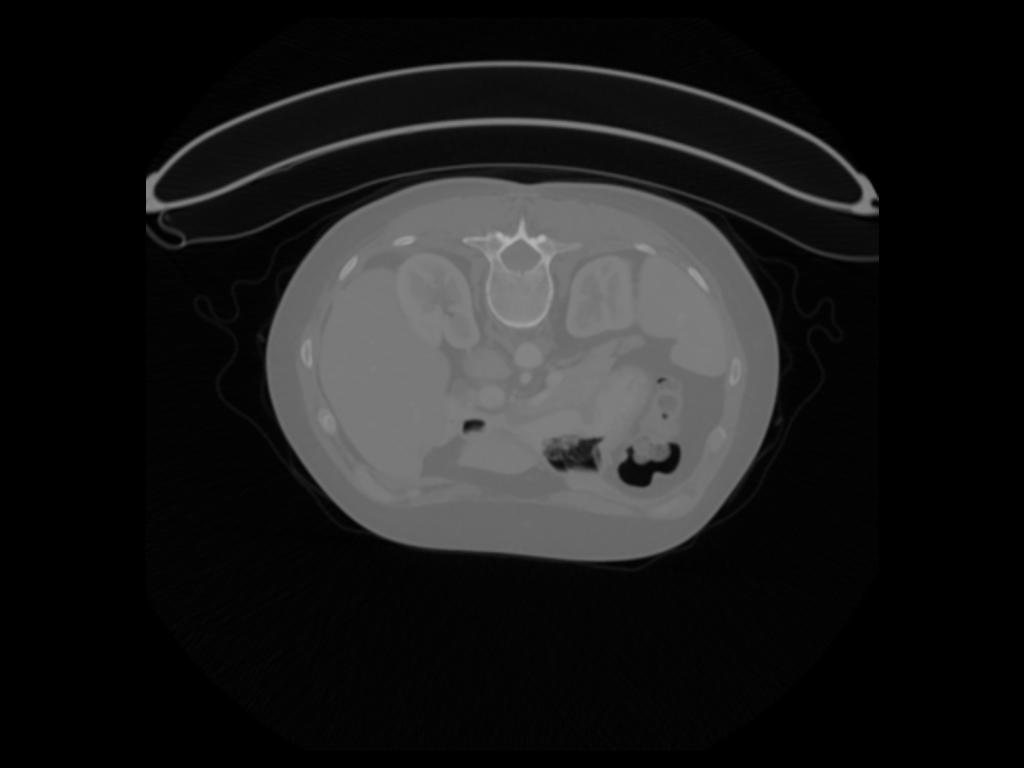

In [3]:
import IPython
display(IPython.display.Image(jpeg_data))

## Switch the camera to front and render again

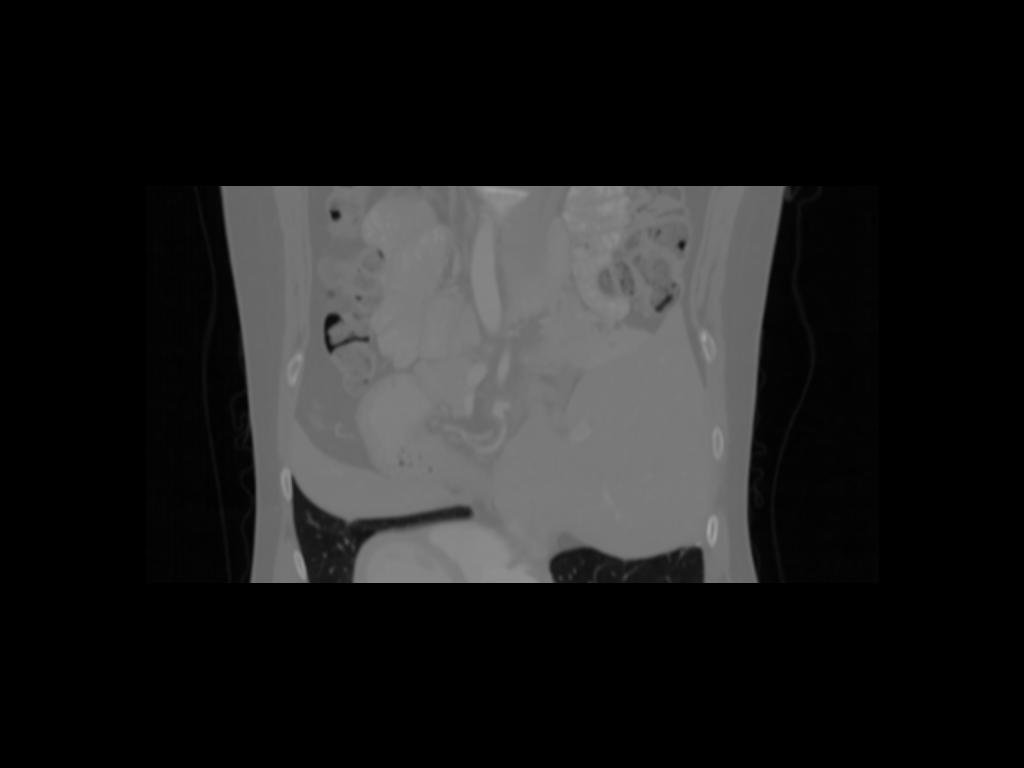

In [4]:
settings['Views'][0]['cameraName'] = 'Front'
renderer.set_settings(settings)
display(IPython.display.Image(renderer.render_image(1024, 768, image_type=clara.viz.core.ImageType.JPEG)))